In [1]:
import numpy as np
import pandas as pd

## 3.2 Data preprocessing

<Axes: xlabel='x', ylabel='y'>

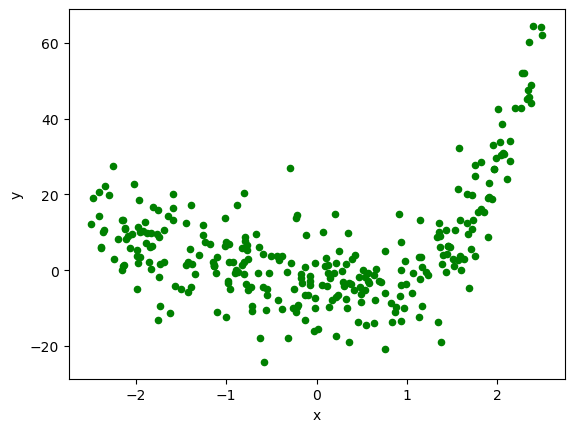

In [23]:
size = 300
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2

X = np.random.rand(size)*5-2.5
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4

df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y', color='green')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

## 3.3 Regression

### 3.3.1 Linear regression

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

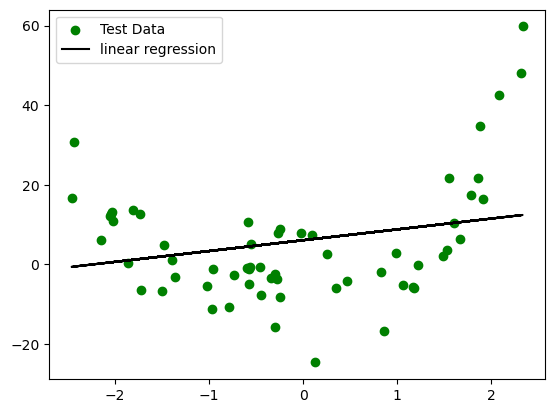

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, label='Test Data', color='green')
plt.plot(X_test, lin_reg.predict(X_test), label='linear regression', color='black')

plt.legend()
plt.show()

### 3.3.2 K-near Neighbors Regression

In [8]:
import sklearn.neighbors

knn_3_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_3_reg.fit(X_train, y_train)

knn_5_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_train, y_train)

KNeighborsRegressor()

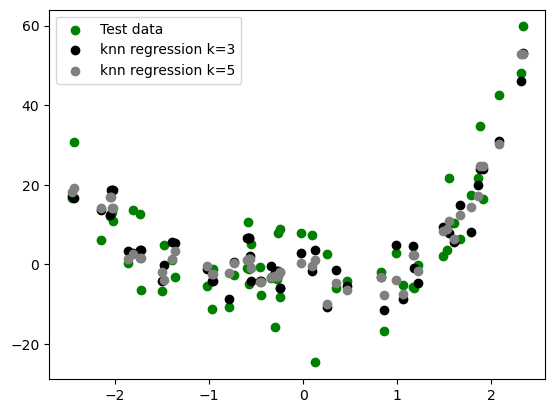

In [28]:
plt.scatter(X_test, y_test, label='Test data', color='green')
plt.scatter(X_test, knn_3_reg.predict(X_test), label='knn regression k=3', color='black')
plt.scatter(X_test, knn_5_reg.predict(X_test), label='knn regression k=5', color='grey')

plt.legend()
plt.show()

### 3.3.3 Polynomial regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_feature_2.fit_transform(X_train)
poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly_2, y_train)

poly_feature_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_3 = poly_feature_3.fit_transform(X_train)
poly_3_reg = LinearRegression()
poly_3_reg.fit(X_poly_3, y_train)

poly_feature_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly_4 = poly_feature_4.fit_transform(X_train)
poly_4_reg = LinearRegression()
poly_4_reg.fit(X_poly_4, y_train)

poly_feature_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly_5 = poly_feature_5.fit_transform(X_train)
poly_5_reg = LinearRegression()
poly_5_reg.fit(X_poly_5, y_train)

LinearRegression()

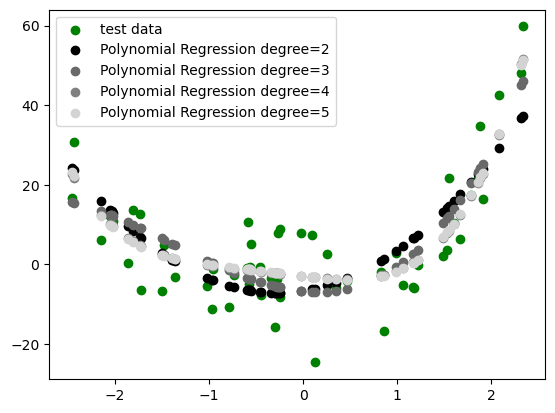

In [27]:
plt.scatter(X_test, y_test, label='test data', color='green')
plt.scatter(X_test, poly_2_reg.predict(poly_feature_2.transform(X_test)), label='Polynomial Regression degree=2', color='black')
plt.scatter(X_test, poly_3_reg.predict(poly_feature_3.transform(X_test)), label='Polynomial Regression degree=3', color='dimgrey')
plt.scatter(X_test, poly_4_reg.predict(poly_feature_4.transform(X_test)), label='Polynomial Regression degree=4', color='grey')
plt.scatter(X_test, poly_5_reg.predict(poly_feature_5.transform(X_test)), label='Polynomial Regression degree=5', color='lightgrey')

plt.legend()
plt.show()

## 3.4 Mean-squared error

In [31]:
from sklearn.metrics import mean_squared_error

dict = {'train_mse': [mean_squared_error(y_train, lin_reg.predict(X_train)), 
                      mean_squared_error(y_train, knn_3_reg.predict(X_train)), 
                      mean_squared_error(y_train, knn_5_reg.predict(X_train)), 
                      mean_squared_error(y_train, poly_2_reg.predict(poly_feature_2.transform(X_train))), 
                      mean_squared_error(y_train, poly_3_reg.predict(poly_feature_3.transform(X_train))), 
                      mean_squared_error(y_train, poly_4_reg.predict(poly_feature_4.transform(X_train))), 
                      mean_squared_error(y_train, poly_5_reg.predict(poly_feature_5.transform(X_train)))],
        
        'test_mse' : [mean_squared_error(y_test, lin_reg.predict(X_test)), 
                      mean_squared_error(y_test, knn_3_reg.predict(X_test)), 
                      mean_squared_error(y_test, knn_5_reg.predict(X_test)), 
                      mean_squared_error(y_test, poly_2_reg.predict(poly_feature_2.transform(X_test))), 
                      mean_squared_error(y_test, poly_3_reg.predict(poly_feature_3.transform(X_test))), 
                      mean_squared_error(y_test, poly_4_reg.predict(poly_feature_4.transform(X_test))), 
                      mean_squared_error(y_test, poly_5_reg.predict(poly_feature_5.transform(X_test)))]}

df_mse = pd.DataFrame(dict, index=['lin_reg', 'knn_3_reg', 'knn_5_reg', 'poly_2_reg', 'poly_3_reg', 'poly_4_reg', 'poly_5_reg'])

df_mse.to_pickle('mse.pkl')
df_mse

,train_mse,test_mse
lin_reg,228.602187,207.192398
knn_3_reg,44.203920,65.685019
knn_5_reg,59.124495,56.786255
poly_2_reg,93.451520,82.552296
poly_3_reg,78.398591,67.805667
poly_4_reg,67.622894,53.242300
poly_5_reg,67.584596,53.122562


## 3.5 Saving to pickle

In [33]:
import pickle
list = [(lin_reg, None), (knn_3_reg, None), (knn_5_reg, None), (poly_2_reg, poly_feature_2),
       (poly_3_reg, poly_feature_3), (poly_4_reg, poly_feature_4), (poly_5_reg, poly_feature_5)]

with open("reg.pkl", 'wb') as f:
    pickle.dump(list, f)